Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [2]:
NAME = "Jing Wang"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [3]:
#!pip install yfinance
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import numpy as np


# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

#I chose to take 60 months/5 years stock data from 2015-01-01 to 2019-12-31

Answer to Q2
for Amazon stock

In [4]:
#60 Months Amazon Adj Close data, 
Amazon = yf.download('AMZN',start='2015-01-01',end='2019-12-31')['Adj Close']
Amazon=pd.DataFrame(Amazon)
# rename column 'Adj Close' to Amazon, for Q6 preparation
Amazon=Amazon.rename(columns={"Adj Close": "Amazon"})


[*********************100%***********************]  1 of 1 completed


Answer to Q3 for Amazon stock

In [5]:
#Resample the data to get prices for the end of the business month.

Amazon = Amazon.resample('BM').last()
Amazon.head(100)


,Amazon
Date,
2015-01-30,354.529999
2015-02-27,380.160004
2015-03-31,372.100006
2015-04-30,421.779999
2015-05-29,429.230011
2015-06-30,434.089996
2015-07-31,536.150024
2015-08-31,512.890015
2015-09-30,511.890015


Answer to Q4 for Amazon stock

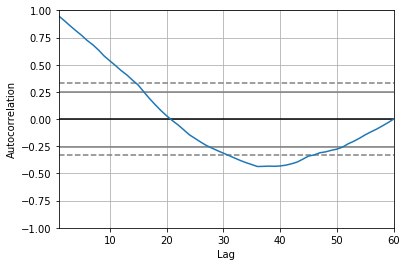

In [6]:
autocorrelation_plot(Amazon)
#Explanation: In month 1 - month 14, there is positive correlation. Strong positive correlation Month1-4, 
#medium positive correlation Month5-Month10. It means when stock price increase in that month, 
#it may continously increase for next 4-14 months
# between month 14 - month 31, there is no correlation in stock price over time.
#there is significant values between month 31 - month 45, show medium negative correlation.
# Later on, there is no correlation in stock price over time.

Answer to Q5 for Amazon stock, Details see below
#Conclusion: there is no correlation between months and Amazon Stock return
#stock return is not related by the time

In [7]:
AmazonMonth=Amazon
AmazonMonthLater=Amazon.shift(1)
AmazonMonthLater.head(10)

,Amazon
Date,
2015-01-30,NaN
2015-02-27,354.529999
2015-03-31,380.160004
2015-04-30,372.100006
2015-05-29,421.779999
2015-06-30,429.230011
2015-07-31,434.089996
2015-08-31,536.150024
2015-09-30,512.890015


In [8]:
#Get Amazon Return
AmazonRtn=AmazonMonth/AmazonMonthLater-1
#Drop Month1 NaN record
AmazonRtn=AmazonRtn.dropna()
AmazonRtn.head()

,Amazon
Date,
2015-02-27,0.072293
2015-03-31,-0.021202
2015-04-30,0.133512
2015-05-29,0.017663
2015-06-30,0.011323


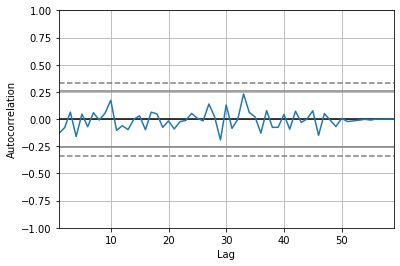

In [9]:
#autocorrelation plot for Amazon return
autocorrelation_plot(AmazonRtn)
#Conclusion: there is no correlation between Amazon Stock return over time

Answer to Q2 for facebook stock

In [10]:
#60 Months Facebook Adj Close data
Facebook = yf.download('FB',start='2015-01-01',end='2019-12-31')['Adj Close']
Facebook=pd.DataFrame(Facebook)
Facebook.head(10)


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2015-01-02,78.449997
2015-01-05,77.190002
2015-01-06,76.150002
2015-01-07,76.150002
2015-01-08,78.180000
2015-01-09,77.739998
2015-01-12,76.720001
2015-01-13,76.449997
2015-01-14,76.279999


Answer to Q3 for facebook stock

In [11]:
Facebook=Facebook.rename(columns={"Adj Close": "Facebook"})
#Resample the data to get prices for the end of the business month.
Facebook = Facebook.resample('BM').last()
Facebook.head(10)

,Facebook
Date,
2015-01-30,75.910004
2015-02-27,78.970001
2015-03-31,82.220001
2015-04-30,78.769997
2015-05-29,79.190002
2015-06-30,85.769997
2015-07-31,94.010002
2015-08-31,89.430000
2015-09-30,89.900002


Answer to Q4 for facebook stock
#Explanation: In month 1 - month 9, there is positive correlation between the Facebook stock price over time,In month 1 - 3, there is strong positive correlation stock price over time, 
,In month 4 - 9, there is weak positive correlation stock price over time,
,Later months, there is no correlation between Facebook stock price over time

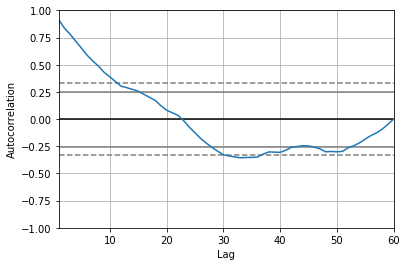

In [12]:
autocorrelation_plot(Facebook)
#Explanation: In month 1 - month 9, there is positive correlation between the Facebook stock price over time
# In month 1 - 3, there is strong positive correlation stock price over time, 
# In month 4 - 9, there is weak positive correlation stock price over time,
# Later months, there is no correlation between Facebook stock price over time

Answer to Q5 for facebook stock, Details see below
#Conclusion: there is no correlation on Facebook Stock return over time

In [13]:
FacebookMonth=Facebook
FacebookMonthLater=Facebook.shift(1)
FacebookMonthLater.head(10)

,Facebook
Date,
2015-01-30,NaN
2015-02-27,75.910004
2015-03-31,78.970001
2015-04-30,82.220001
2015-05-29,78.769997
2015-06-30,79.190002
2015-07-31,85.769997
2015-08-31,94.010002
2015-09-30,89.430000


In [14]:
#Get the return
FacebookRtn=FacebookMonth/FacebookMonthLater-1
#Drop Month1 NaN record
FacebookRtn=FacebookRtn.dropna()
FacebookRtn.head()

,Facebook
Date,
2015-02-27,0.040311
2015-03-31,0.041155
2015-04-30,-0.041961
2015-05-29,0.005332
2015-06-30,0.083091


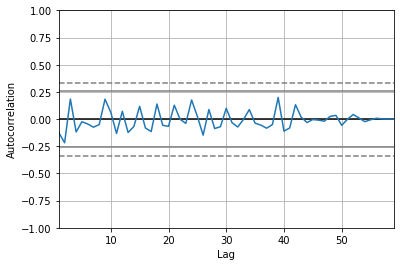

In [15]:
autocorrelation_plot(FacebookRtn)
#Conclusion: there is no correlation on Facebook Stock return over time

Answer to Q1 for IBM Stock

In [16]:
#60 Months IBM Adj Close data
IBM = yf.download('IBM',start='2015-01-01',end='2019-12-31')['Adj Close']
IBM=pd.DataFrame(IBM)
IBM.head(10)

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2015-01-02,129.241516
2015-01-05,127.207932
2015-01-06,124.464600
2015-01-07,123.651100
2015-01-08,126.338654
2015-01-09,126.888924
2015-01-12,124.759621
2015-01-13,125.054688
2015-01-14,124.249229


Answer to Q2 for IBM Stock

In [17]:
IBM=IBM.rename(columns={"Adj Close": "IBM"})
#Resample the data to get prices for the end of the business month.
IBM = IBM.resample('BM').last()
IBM.head(10)

,IBM
Date,
2015-01-30,122.263451
2015-02-27,130.051773
2015-03-31,128.895309
2015-04-30,137.560608
2015-05-29,138.332123
2015-06-30,132.632507
2015-07-31,132.086212
2015-08-31,121.590149
2015-09-30,119.189430


Answer to Q3 for IBM Stock
#Explanation: In month 1 - month 2, there is weak positive correlation on the IBM stock price over time,Later on, there is no correlation on IBM stock price over time

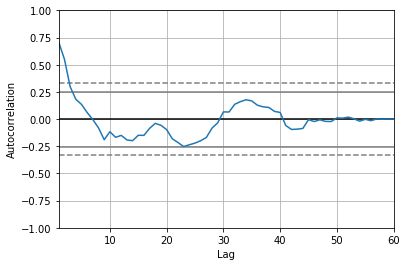

In [18]:
# Autocorrelation plot for IBM
autocorrelation_plot(IBM)
#Explanation: In month 1 - month 2, there is weak positive correlation on the IBM stock price over time
# Later on, there is no correlation between IBM stock price and time

Answer to Q5 for IBM Stock, Conclusion: there is no correlation on  IBM Stock return over time

In [19]:
IBMMonth=IBM
IBMMonthLater=IBM.shift(1)
IBMMonthLater.head(10)

,IBM
Date,
2015-01-30,NaN
2015-02-27,122.263451
2015-03-31,130.051773
2015-04-30,128.895309
2015-05-29,137.560608
2015-06-30,138.332123
2015-07-31,132.632507
2015-08-31,132.086212
2015-09-30,121.590149


In [20]:
#Get the return
IBMRtn=IBMMonth/IBMMonthLater-1
#Drop Month1 NaN record
IBMRtn=IBMRtn.dropna()
IBMRtn.head()

,IBM
Date,
2015-02-27,0.063701
2015-03-31,-0.008892
2015-04-30,0.067227
2015-05-29,0.005609
2015-06-30,-0.041202


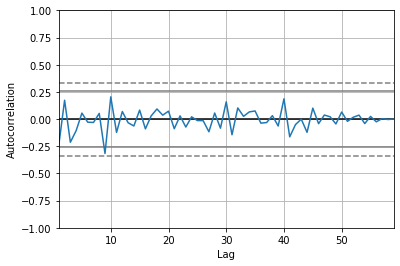

In [21]:
autocorrelation_plot(IBMRtn)
#Conclusion: there is no correlation on IBM Stock return over time

Answer to Q2 for stock MMM

In [22]:
#60 Months MMM Adj Close data
MMM = yf.download('MMM',start='2015-01-01',end='2019-12-31')['Adj Close']
MMM = pd.DataFrame(MMM)

[*********************100%***********************]  1 of 1 completed


Answer to Q3 for stock MMM

In [23]:
MMM=MMM.rename(columns={"Adj Close": "MMM"})
#Resample the data to get prices for the end of the business month.
MMM = MMM.resample('BM').last()
MMM.head(10)

,MMM
Date,
2015-01-30,140.537079
2015-02-27,146.943909
2015-03-31,143.720108
2015-04-30,136.261826
2015-05-29,139.482086
2015-06-30,135.290970
2015-07-31,132.695602
2015-08-31,125.496330
2015-09-30,125.169655


Asnwer to Q4 for stock MMM,
Explanation: In month 1 - month 9, there is positive correlation , month 1-3, there is strong positive correlation, 
month3-9, weak positive correlation
Later on, there is no correlation

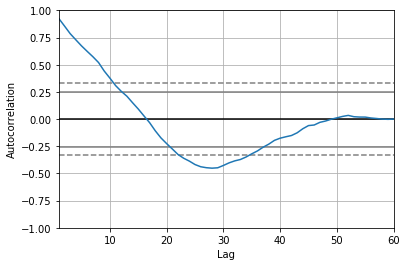

In [24]:
autocorrelation_plot(MMM)
#Explanation: In month 1 - month 9, there is positive correlation , month 1-3, there is strong positive correlation, 
#month3-9, weak positive correlation
# Later on, there is no correlation

Answer to Q5 for Stock MMM,
Conclusion: there is no correlation MMM stock return over time

In [25]:
MMMMonth=MMM
MMMMonthLater=MMM.shift(1)
MMMMonthLater.head(10)

,MMM
Date,
2015-01-30,NaN
2015-02-27,140.537079
2015-03-31,146.943909
2015-04-30,143.720108
2015-05-29,136.261826
2015-06-30,139.482086
2015-07-31,135.290970
2015-08-31,132.695602
2015-09-30,125.496330


In [26]:
#Get the return
MMMRtn=MMMMonth/MMMMonthLater-1
#Drop Month1 NaN record
MMMRtn=MMMRtn.dropna()
MMMRtn.head()

,MMM
Date,
2015-02-27,0.045588
2015-03-31,-0.021939
2015-04-30,-0.051894
2015-05-29,0.023633
2015-06-30,-0.030048


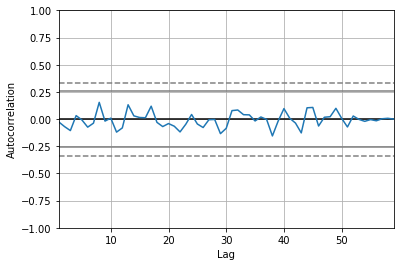

In [27]:
autocorrelation_plot(MMMRtn)
plt.show()
#Conclusion: there is no correlation MMM stock return over time

Answer to Q6, Combine 4 stocks return, show scatter matrix for four tocks,check if there is correlated between.
##Conclusion:
##In general, they all have positive correlation with each other
##Stock MMM return  has weak correlation to IBM,  Amazon return 
##IBM return has weak correlation to IBM,MMM return
##Amazon has weak correlation to three stock return: Facebook ,IBM,MMM return
##Facebook return has weak correlation to Amazon return

In [28]:
#Combine 4 stocks return
All_FourStocksRtn=pd.concat([MMMRtn,IBMRtn,FacebookRtn,AmazonRtn],axis=1)
All_FourStocksRtn=pd.DataFrame(All_FourStocksRtn)

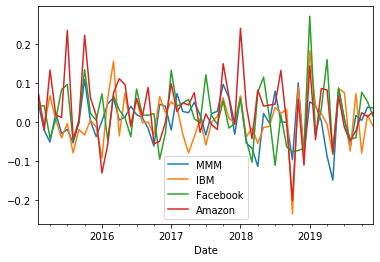

In [29]:
All_FourStocksRtn.plot()
plt.show()

In [30]:
All_FourStocksRtn.corr()

,MMM,IBM,Facebook,Amazon
MMM,1.000000,0.584701,0.163499,0.392395
IBM,0.584701,1.000000,0.214567,0.474539
Facebook,0.163499,0.214567,1.000000,0.531688
Amazon,0.392395,0.474539,0.531688,1.000000


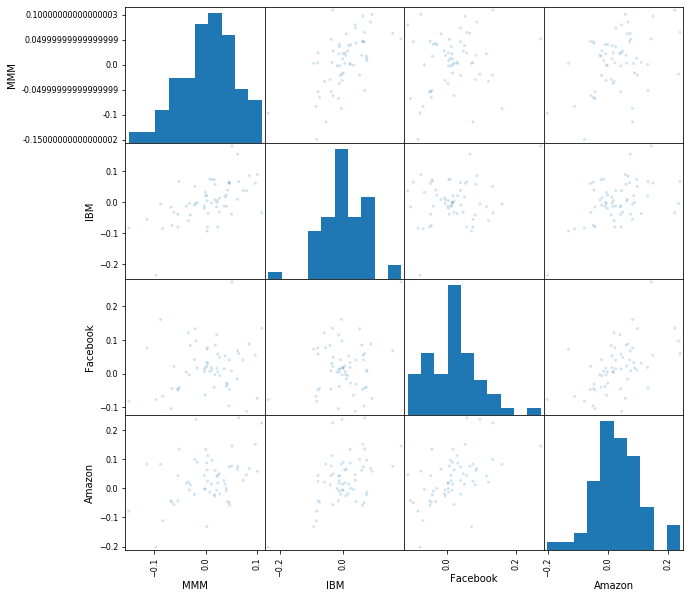

In [31]:
#Show Scatter Matrix for all four stocks return
scatter_matrix(All_FourStocksRtn, alpha=0.2, figsize=(10, 10))
plt.show() 
## Conclusion:
## In general, they all have positive correlation with each other
## Stock MMM return  has weak correlation to IBM,  Amazon return 
## IBM return has weak correlation to IBM,MMM return
## Amazon has weak correlation to three stock return: Facebook ,IBM,MMM return
## Facebook return has weak correlation to Amazon return